## ToDo
Monthly Time Difference Set to SMA start

# Config

In [1]:
app_id = "ZYNNQ1EECF-100"
secret_id = "3W4F0X0G11"
redirect_url = "https://www.google.com/"

market_opening_hour = 9
market_opening_minute = 15
market_closing_hour = 15
market_closing_minute = 15
start_date = "2023-08-07" 
end_date = "2023-10-07"

fetch_data_from = "fyers"

# Change in Price
period = 2

# SMA Period
short_window = 5
long_window = 20

# Backtest Data
inital_capital = 200000
no_of_lots = 2
lot_size = 50

# Fyers Client Session

In [2]:
from fyers_apiv3 import fyersModel

client_id = app_id
secret_key = secret_id
redirect_uri = redirect_url
response_type = "code"  

session = fyersModel.SessionModel(
    client_id=app_id,
    secret_key=secret_id,
    redirect_uri=redirect_url,
    response_type="code",
    grant_type = "authorization_code"
)

response = session.generate_authcode()

print(response)

https://api-t1.fyers.in/api/v3/generate-authcode?client_id=ZYNNQ1EECF-100&redirect_uri=https%3A%2F%2Fwww.google.com%2F&response_type=code&state=None


# Auth Code From Redirect Url

In [3]:
auth_code="eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJpYXQiOjE2OTY2OTgyNDUsImV4cCI6MTY5NjcyODI0NSwibmJmIjoxNjk2Njk3NjQ1LCJhdWQiOiJbXCJ4OjBcIiwgXCJ4OjFcIiwgXCJ4OjJcIiwgXCJkOjFcIiwgXCJkOjJcIiwgXCJ4OjFcIiwgXCJ4OjBcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYTDA1NzM0Iiwib21zIjoiSzEiLCJoc21fa2V5IjoiZWQxNGYwNTE1N2JkOGQ1NTQ1Y2IyNmZiODAxZTI0NDBlZGYyNmZiYjkzZjQ4ZmVmOGFiZmUxYWQiLCJub25jZSI6IiIsImFwcF9pZCI6IlpZTk5RMUVFQ0YiLCJ1dWlkIjoiYmE2NDk4Y2E4N2EwNGEwYzkwNTk1ODEzM2U0ZWVjNGEiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.03hWvYm2bdRHn17QrMkyIgsjVbnvQYnSLceqrxTOVIo"

# Session Status and Access Token

In [4]:
session.set_token(auth_code)

response = session.generate_token()

access_token = response['access_token']

print(response)

{'s': 'ok', 'code': 200, 'message': '', 'access_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTY2OTgyNzIsImV4cCI6MTY5NjcyNTAzMiwibmJmIjoxNjk2Njk4MjcyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbElZLWdvZ09uNHZDQ3o1b1o3WTdKaWdxeTkzalRWOUdtRUE4Y2xtUkdGdzFUUWNraHlKZmVxZDZ1akJPeFhfS3N1N1l2Y0hGNU9VUTVwNjRfbFd1VE5jeHhpTzFETTRBemJmd1U3NHdfaF9qOHVrcz0iLCJkaXNwbGF5X25hbWUiOiJMQUtTSElUIiwib21zIjoiSzEiLCJoc21fa2V5IjoiZWQxNGYwNTE1N2JkOGQ1NTQ1Y2IyNmZiODAxZTI0NDBlZGYyNmZiYjkzZjQ4ZmVmOGFiZmUxYWQiLCJmeV9pZCI6IlhMMDU3MzQiLCJhcHBUeXBlIjoxMDAsInBvYV9mbGFnIjoiTiJ9.98TOEGwHjspTNWh56zULz_kSSZdqJen422Qu9lHP3G0', 'refresh_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTY2OTgyNzIsImV4cCI6MTY5NzkzNDYzMiwibmJmIjoxNjk2Njk4MjcyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6InJlZnJlc2hfdG9rZW4iLCJhdF9oYXNoIjoiZ0FBQUFBQmxJWS1nb2dPbjR2

# Create Fyers Client

In [5]:
from os import getcwd
client = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path=getcwd())

# Historical Data

## Fyers

In [10]:
import pandas as pd
import pytz

if fetch_data_from == "fyers":
    data = {
        "symbol":"NSE:NIFTY50-INDEX",
        "resolution":"1D",
        "date_format":"1",
        "range_from": start_date,
        "range_to": end_date,
        "cont_flag":"1"
    }

    response = client.history(data=data)
    # print(response)
    df = pd.DataFrame(response['candles'], columns=['Time', "Open", "High", "Low", "Close", "Volume"])    

    # Epoch Time to Human Readable
    ist = pytz.timezone('Asia/Kolkata')
    df['Time'] = pd.to_datetime(df['Time'], unit='s').dt.tz_localize(pytz.UTC).dt.tz_convert(ist)   

    # df = df.set_index("Time") 

## Csv Import

In [11]:
if fetch_data_from == "csv":
    df = pd.read_csv('NiftyData.csv')
    df = df.drop(columns=["Unnamed: 0", "INDEX_NAME", "Index Name"])
    df.rename(columns={"HistoricalDate":"Time", "OPEN": "Open", "LOW": "Low", "CLOSE":"Close", "HIGH": "High" }, inplace=True)
    df = df[::-1].reset_index(drop=True)

In [12]:
df.head()

,Time,Open,High,Low,Close,Volume
0,2023-08-07 05:30:00+05:30,19576.85,19620.45,19524.80,19597.30,0
1,2023-08-08 05:30:00+05:30,19627.20,19634.40,19533.10,19570.85,0
2,2023-08-09 05:30:00+05:30,19578.80,19645.50,19467.50,19632.55,0
3,2023-08-10 05:30:00+05:30,19605.55,19623.60,19495.40,19543.10,0
4,2023-08-11 05:30:00+05:30,19554.25,19557.75,19412.75,19428.30,0


# Change in Price

In [13]:
from numpy import nan
from math import isnan

df[f'{period}_day_price_change'] = df['Close'].diff(periods=period)
prediction = []
for i in range(0, len(df)):
    is_positive_trend = df[f'{period}_day_price_change'].iloc[i] > 0
    if is_positive_trend and not isnan(df[f'{period}_day_price_change'].iloc[i]):
       prediction.append("Gap Up")
    elif not is_positive_trend and not isnan(df[f'{period}_day_price_change'].iloc[i]):
        prediction.append('Gap Down')
    elif isnan(df[f'{period}_day_price_change'].iloc[i]):
        prediction.append(nan)
df['Change_Price_Prediction'] = prediction

## Actual Gap

In [14]:
gap_list = []
for i in range(0, len(df) - 1):
    gap = df.iloc[i+1].Open - df.iloc[i].Close
    gap_list.append(round(gap,2))    
df.loc[0, 'Actual_Gap'] = nan
df['Actual_Gap'].iloc[period-1:] =  gap_list    

/var/folders/7k/mwk0ry_90p1gvfnc7vymq21w0000gn/T/ipykernel_3065/1635259681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actual_Gap'].iloc[period-1:] =  gap_list


## Historical Trend with SMA

In [15]:
df['SMA_Short'] = df['Close'].rolling(window=short_window).mean()
df['SMA_Long'] = df['Close'].rolling(window=long_window).mean()
sma_prediction = []
for i in range(0, len(df)):
    if df['SMA_Short'].iloc[i] > df['SMA_Long'].iloc[i]:
        sma_prediction.append("Up Trend")
    elif df['SMA_Short'].iloc[i] < df['SMA_Long'].iloc[i]:
        sma_prediction.append("Down Trend")    

df['Historical_Trend'] = nan
if fetch_data_from == "fyers":
    df['Historical_Trend'].iloc[long_window - 1:] = sma_prediction
if fetch_data_from == "csv":
    df['Historical_Trend'].iloc[long_window:] = sma_prediction    

/var/folders/7k/mwk0ry_90p1gvfnc7vymq21w0000gn/T/ipykernel_3065/3772671531.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Historical_Trend'].iloc[long_window - 1:] = sma_prediction


In [16]:
df.head(20)

,Time,Open,High,Low,Close,Volume,2_day_price_change,Change_Price_Prediction,Actual_Gap,SMA_Short,SMA_Long,Historical_Trend
0,2023-08-07 05:30:00+05:30,19576.85,19620.45,19524.80,19597.30,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-08-08 05:30:00+05:30,19627.20,19634.40,19533.10,19570.85,0,NaN,NaN,29.90,NaN,NaN,NaN
2,2023-08-09 05:30:00+05:30,19578.80,19645.50,19467.50,19632.55,0,35.25,Gap Up,7.95,NaN,NaN,NaN
3,2023-08-10 05:30:00+05:30,19605.55,19623.60,19495.40,19543.10,0,-27.75,Gap Down,-27.00,NaN,NaN,NaN
4,2023-08-11 05:30:00+05:30,19554.25,19557.75,19412.75,19428.30,0,-204.25,Gap Down,11.15,19554.42,NaN,NaN
5,2023-08-14 05:30:00+05:30,19383.95,19465.85,19257.90,19434.55,0,-108.55,Gap Down,-44.35,19521.87,NaN,NaN
6,2023-08-16 05:30:00+05:30,19369.00,19482.75,19317.20,19465.00,0,36.70,Gap Up,-65.55,19500.70,NaN,NaN
7,2023-08-17 05:30:00+05:30,19450.55,19461.55,19326.25,19365.25,0,-69.30,Gap Down,-14.45,19447.24,NaN,NaN
8,2023-08-18 05:30:00+05:30,19301.75,19373.80,19253.60,19310.15,0,-154.85,Gap Down,-63.50,19400.65,NaN,NaN
9,2023-08-21 05:30:00+05:30,19320.65,19425.95,19296.30,19393.60,0,28.35,Gap Up,10.50,19393.71,NaN,NaN


# Time Difference in Months

In [29]:
from datetime import datetime

s_date = df.iloc[long_window-1].Time
start_date = f"{s_date.year}-{s_date.month}-{s_date.day}"

if fetch_data_from == "fyers":
    start_date_ = datetime.strptime(start_date, "%Y-%m-%d")
    end_date_ = datetime.strptime(end_date, "%Y-%m-%d")
    months_difference = ((end_date_.year - start_date_.year) * 12 + (end_date_.month - start_date_.month))


elif fetch_data_from == "csv":
    start_date_ = pd.to_datetime(df['Time'][0])
    end_date_ = pd.to_datetime(df["Time"][-1:].values)
    start_date = df['Time'].head(1).values[0]
    end_date = df['Time'].tail(1).values[0]
    months_difference = ((end_date_.year - start_date_.year) * 12 + (end_date_.month - start_date_.month))[0]


# Day Opening and Closing Data Collection

In [30]:
if fetch_data_from == "fyers":
    trade_info = {
        'day_closing': [],
        'day_opening': []
    }
    df = df.set_index("Time") 
    for i in range(0,len(df)):
        if df.index[i].hour == market_opening_hour and df.index[i].minute == market_opening_minute:
                trade_info['day_opening'].append(df.index[i])
        elif df.index[i].hour == market_closing_hour and df.index[i].minute == market_closing_minute:
                trade_info['day_closing'].append(df.index[i])
df = df.reset_index()

# BTST Logic

In [31]:
pnl_list = [] 

for i in range(0, len(df) - 1):
    # Winning Case
    if (df['Actual_Gap'].iloc[i] > 0 and df["Change_Price_Prediction"].iloc[i] == "Gap Up" and df['Historical_Trend'].iloc[i] == "Up Trend"):
        pnl = df['Actual_Gap'].iloc[i]
        pnl_list.append(round(pnl,2)) 

    elif (df['Actual_Gap'].iloc[i] < 0 and df["Change_Price_Prediction"].iloc[i] == "Gap Down" and df['Historical_Trend'].iloc[i] == "Down Trend"):
        pnl = abs(df['Actual_Gap'].iloc[i])
        pnl_list.append(round(pnl,2)) 

    # Loosing Case
    elif (df['Actual_Gap'].iloc[i] < 0 and df["Change_Price_Prediction"].iloc[i] == "Gap Up" and df['Historical_Trend'].iloc[i] == "Up Trend"):
        pnl = df['Actual_Gap'].iloc[i]
        pnl_list.append(round(pnl,2)) 
    
    elif (df['Actual_Gap'].iloc[i] > 0 and df["Change_Price_Prediction"].iloc[i] == "Gap Down" and df['Historical_Trend'].iloc[i] == "Down Trend"):
        pnl = -(df['Actual_Gap'].iloc[i])
        pnl_list.append(round(pnl,2)) 

# BTST Results

In [32]:
total_profits = sum(1 for profit in pnl_list if profit > 0)
total_losses = sum(1 for loss in pnl_list if loss < 0)

In [33]:
print(total_profits)
print(total_losses)

8
6


3726
1947

## Paper Trading Results

In [34]:
def ConsecutivePL(pnl_data):
    l_streak, w_streak = 0, 0
    max_loosing_streak, max_winning_streak = 0,0
    for i in pnl_data:
        if i < 0:
            l_streak+=1
            if l_streak > max_loosing_streak:
                max_loosing_streak = l_streak        
        elif i > 0:
            l_streak = 0
        if i > 0:
            w_streak+=1
            if w_streak > max_winning_streak:
                max_winning_streak = w_streak        
        elif i < 0:
            w_streak = 0
    return {"Winning_Streak": max_winning_streak, "Loosing_Streak": max_loosing_streak }

def MaxConsecutivePL(pnl_data, lot_size, no_of_lots):
    l_streak, p_streak = 0, 0
    max_loss_streak, max_profit_streak = 0,0
    for i in pnl_data:
        if i < 0:
            l_streak+=i
            if l_streak < max_loss_streak:
                max_loss_streak = l_streak        
        elif i > 0:
            l_streak = 0
        if i > 0:
            p_streak+=i
            if p_streak > max_profit_streak:
                max_profit_streak = p_streak        
        elif i < 0:
            p_streak = 0
    return {"Max_Profit_Streak": round(max_profit_streak*lot_size*no_of_lots,2), 
            "Max_Loss_Streak": round(max_loss_streak*lot_size*no_of_lots,2) }

def WLRate(pnl_data):
    win_rate = 0
    loss_rate = 0
    for pnl in pnl_data:
        if pnl > 0:
            win_rate+=1
        else:
            loss_rate+=1
    total = total_profits + total_losses
    win_rate = round(total_profits*100/total,2)
    loss_rate = round(total_losses*100/total,2)
    return {"Win_Rate": win_rate, "Loss_Rate": loss_rate}


# Max DrawDown
def MaxDD(capital_movement):
    max_drawdown = 0
    current_drawdown = 0
    peak_value = capital_movement[0]
    for capital in capital_movement:
        if capital > peak_value:
            peak_value = capital

        current_drawdown = peak_value - capital
        if current_drawdown > max_drawdown:
            max_drawdown = current_drawdown
    return max_drawdown

def FinalCapital(inital_capital, no_of_lots, lot_size):
    final_capital = inital_capital
    capital_movement = [final_capital]
    for pnl in pnl_list:
        final_capital += (pnl*no_of_lots*lot_size)
        capital_movement.append(final_capital) 
    return final_capital, capital_movement

def PNLs(no_of_lots, lot_size):
    pnls = []
    for pnl in pnl_list:
        pnls.append(pnl*no_of_lots*lot_size)
    return pnls

def AveragePNL(pnl_data,no_of_lots,lot_size):
    total_sum = 0
    for pnl in pnl_data:
        total_sum+=(pnl*no_of_lots*lot_size)
    average = total_sum/len(pnl_data)
    return round(average,2)

def AveragePNLPerTrade(pnl_data, no_of_lots,lot_size):
    total_sum_l,total_sum_p = 0,0
    no_of_losses, no_of_profits = 0,0
    for pnl in pnl_data:
        if pnl < 0:
            total_sum_l+=(pnl*no_of_lots*lot_size)
            no_of_losses+=1
        elif pnl > 0:
            total_sum_p+=(pnl*no_of_lots*lot_size)
            no_of_profits+=1
    average_loss = round(total_sum_l/no_of_losses,2)
    average_profit = round(total_sum_p/no_of_profits,2)
    return {"Average_Profits_Per_Trade": average_profit, "Average_Loss_Per_Trade": average_loss}

In [35]:
capital_movement = FinalCapital(inital_capital, no_of_lots, lot_size)[1]

final_capital = FinalCapital(inital_capital, no_of_lots, lot_size)[0]
roi = final_capital - inital_capital
roi_per = roi*100/inital_capital
max_profit = round(max(PNLs(no_of_lots, lot_size)),2)
max_loss = round(min(PNLs(no_of_lots, lot_size)),2)
max_drawdown = MaxDD(capital_movement)
mdd_per = round(max_drawdown*100/inital_capital,2)
max_winning_streak = ConsecutivePL(pnl_list)['Winning_Streak']
max_loosing_streak = ConsecutivePL(pnl_list)['Loosing_Streak']
pnl_per_trade = AveragePNL(pnl_list,no_of_lots,lot_size)
max_profit_steak = MaxConsecutivePL(pnl_list, lot_size, no_of_lots)['Max_Profit_Streak']
max_loss_steak = MaxConsecutivePL(pnl_list,lot_size, no_of_lots)['Max_Loss_Streak']
win_rate = WLRate(pnl_list)['Win_Rate']
loss_rate = WLRate(pnl_list)['Loss_Rate']
average_profit_on_win_trade = AveragePNLPerTrade(pnl_list, no_of_lots,lot_size)["Average_Profits_Per_Trade"]
average_loss_on_loss_trade = AveragePNLPerTrade(pnl_list, no_of_lots,lot_size)["Average_Loss_Per_Trade"]
return_over_mdd = round(roi_per/mdd_per,2)
risk_to_reward = round(abs(average_profit_on_win_trade/average_loss_on_loss_trade),2)
expectancy_ratio = round((risk_to_reward*(win_rate/100))-(loss_rate/100),2)

In [36]:
from IPython.display import Markdown as md

md("# Performance Summary\n Start Date: {}</br> End Date: {}</br>Time Period: {} Months</br> Initial Capital: {}</br>\
Final Capital: {}</br> \
   Return on Investment: {}</br> \
   ROI Percentage: {}%</br> Max Profit: {}</br> Max Loss: {}</br> \
  Max Draw Down: {}</br> Max Draw Down Percentage: {} </br> Max Winning Streak: {} \
  </br> Max Loosing Streak: {}</br> Average PNL Per Trade: {}</br>\
  Max Profit Streak: {} </br> Max Loss Streak: {}</br> Win Rate: {}% </br> Loss Rate: {}%</br>\
  Average Profit on Win Trade: {}</br> Average Loss on Loss Trade: {}</br>\
  Return Over Max Draw Down: {}</br> Risk to Reward Ratio: {}</br> Expectancy Ratio: {}".format(
                                    start_date, end_date, months_difference, inital_capital,
                                    final_capital, roi, roi_per,
                                    max_profit,max_loss, -max_drawdown,
                                    -mdd_per,max_winning_streak, max_loosing_streak, pnl_per_trade,
                                    max_profit_steak, max_loss_steak, win_rate, loss_rate,
                                    average_profit_on_win_trade, average_loss_on_loss_trade,
                                    return_over_mdd, risk_to_reward, expectancy_ratio))

# Performance Summary
 Start Date: 2023-9-4</br> End Date: 2023-10-07</br>Time Period: 1 Months</br> Initial Capital: 200000</br>Final Capital: 230375.0</br>    Return on Investment: 30375.0</br>    ROI Percentage: 15.1875%</br> Max Profit: 11380.0</br> Max Loss: -5765.0</br>   Max Draw Down: -14765.0</br> Max Draw Down Percentage: -7.38 </br> Max Winning Streak: 3   </br> Max Loosing Streak: 4</br> Average PNL Per Trade: 2169.64</br>  Max Profit Streak: 23160.0 </br> Max Loss Streak: -14765.0</br> Win Rate: 57.14% </br> Loss Rate: 42.86%</br>  Average Profit on Win Trade: 5843.75</br> Average Loss on Loss Trade: -2729.17</br>  Return Over Max Draw Down: 2.06</br> Risk to Reward Ratio: 2.14</br> Expectancy Ratio: 0.79

<Axes: xlabel='Time'>

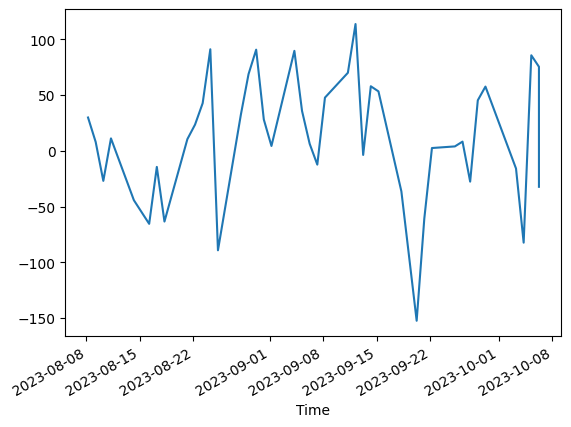

In [37]:
df = df.set_index('Time')
df['Actual_Gap'].plot()